In [1]:
import qiskit 
import numpy as np
from qiskit import Aer, QuantumCircuit, execute, ClassicalRegister, QuantumRegister, BasicAer
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from math import pi, sqrt

In [6]:
 # printing the qiskit version
qiskit.__qiskit_version__

C:\Users\madua\AppData\Roaming\Python\Python38\site-packages\qiskit\aqua\__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


{'qiskit-terra': '0.18.0', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.15.0', 'qiskit-aqua': '0.9.4', 'qiskit': '0.28.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [8]:
#how to display the basic backends
# ie the Aer and Basic Aer
''' the difference between the two backend is that the Aer simulator is written
with the c++ while the BasicAer is written with python'''



Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

myj


In [10]:
BasicAer.backends()

[<QasmSimulatorPy('qasm_simulator')>,
 <StatevectorSimulatorPy('statevector_simulator')>,
 <UnitarySimulatorPy('unitary_simulator')>]

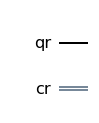

In [15]:
cr = ClassicalRegister(1, 'cr')
qr = QuantumRegister(1, 'qr')
qc = QuantumCircuit(qr,cr)
qc.draw('mpl')

PAULI X GATE ON QISKIT


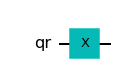

In [16]:
qr_x = QuantumRegister(1,'qr')
qc_x = QuantumCircuit(qr_x)
qc_x.x(qr_x[0])
#qc_x.save_statevector()
#qc_x.save_unitary()
qc_x.draw('mpl')


 Qauantum state is : [0.+0.j 1.+0.j]


C:\Users\madua\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


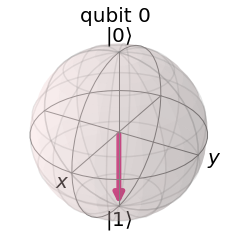

In [17]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc_x, backend).result().get_statevector(qc_x, decimals=3)
print("\n Qauantum state is :", result)
plot_bloch_multivector(result)

In [19]:
#to print the unitary
backend = Aer.get_backend('unitary_simulator')
x_unitary = execute(qc_x, backend)
x_result = x_unitary.result().get_unitary(qc_x, decimals=3)
x_result

array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])

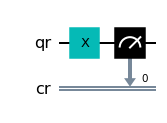

In [23]:
#to plot the histogram
cr_x = ClassicalRegister(1, 'cr')
qr_x = QuantumRegister(1,'qr')
qc_x = QuantumCircuit(qr_x,cr_x)
qc_x.x(qr_x[0])
qc_x.measure(0,0)
qc_x.draw('mpl')

In [24]:
#the state here is one so we are exepected to measure one only to the prove that:
#we will use a qasm simulator which is an emulator because it can emulate a perfect hardware

backend = Aer.get_backend('qasm_simulator')
job = execute(qc_x, backend, shots=1000) #the shots means that the circuit
#will be run 1000 times inorder to collate a stastiscal measurement of the result
result = job.result()
counts = result.get_counts(qc_x)
print('\nTotal counts are: ', counts)



Total counts are:  {'1': 1000}


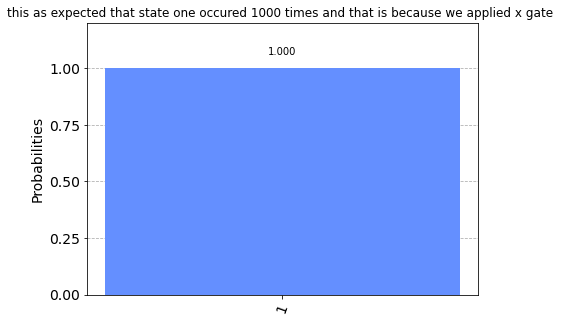

In [26]:
plot_histogram(counts, title= "this as expected that state one occured 1000 times and that is because we applied x gate ")

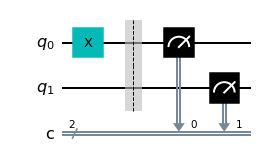

In [27]:
qc_x = QuantumCircuit(2,2, name='qc')
qc_x.x(0)
qc_x.barrier()
qc_x.measure(0,0)
qc_x.measure(1,1)

#qc_x.meausre([0,1],[0,1])
qc_x.draw('mpl')

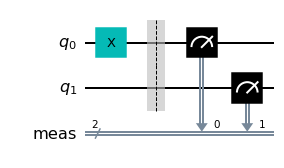

In [31]:
qc = QuantumCircuit(2, name='qc')
qc.x(0)
qc.measure_all()
qc.draw('mpl')

PAULI Y and Z GATE 

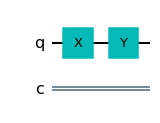

In [6]:
qc_y = QuantumCircuit(1,1, name = 'qc')
qc_y.x(0)
qc_y.y(0)
qc_y.draw('mpl')


 Qauantum state is : [-0.-1.j -0.+0.j]


C:\Users\madua\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


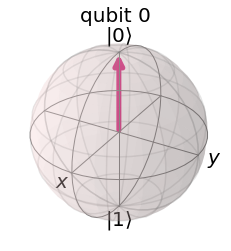

In [7]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc_y, backend).result().get_statevector(qc_y, decimals=3)
print("\n Qauantum state is :", result)
plot_bloch_multivector(result)

In [8]:
backend = Aer.get_backend('unitary_simulator')
y_unitary = execute(qc_y, backend)
y_result = y_unitary.result().get_unitary(qc_y, decimals=3)
y_result

array([[-0.-1.j,  0.-0.j],
       [-0.+0.j,  0.+1.j]])

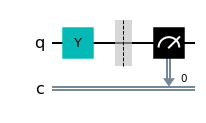

In [9]:
qc_y = QuantumCircuit(1,1, name = 'qc')
qc_y.y(0)
qc_y.barrier()
qc_y.measure(0,0)
qc_y.draw('mpl')

In [10]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc_y, backend, shots=1000) #the shots means that the circuit
#will be run 1000 times inorder to collate a stastiscal measurement of the result
result = job.result()
counts = result.get_counts(qc_y)
print('\nTotal counts are: ', counts)


Total counts are:  {'1': 1000}


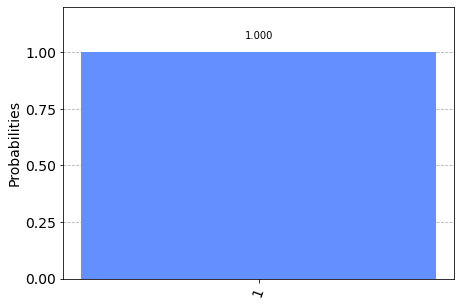

In [37]:
plot_histogram(counts)

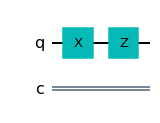

In [12]:
qc_z = QuantumCircuit(1,1, name = 'qc')
qc_z.x(0)
qc_z.z(0)
qc_z.draw('mpl')


 Qauantum state is : [ 0.+0.j -1.-0.j]


C:\Users\madua\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


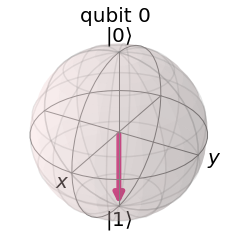

In [13]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc_z, backend).result().get_statevector(qc_z, decimals=3)
print("\n Qauantum state is :", result)
plot_bloch_multivector(result)

In [14]:
backend = Aer.get_backend('unitary_simulator')
z_unitary = execute(qc_z, backend)
z_result = z_unitary.result().get_unitary(qc_z, decimals=3)
z_result

array([[ 0.+0.j,  1.+0.j],
       [-1.-0.j,  0.+0.j]])

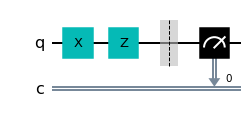

In [47]:
qc_z = QuantumCircuit(1,1, name = 'qc')
qc_z.x(0)
qc_z.z(0)
qc_z.barrier()
qc_z.measure(0,0)
qc_z.draw('mpl')

In [48]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc_z, backend, shots=1000) #the shots means that the circuit
#will be run 1000 times inorder to collate a stastiscal measurement of the result
result = job.result()
counts = result.get_counts(qc_z)
print('\nTotal counts are: ', counts) 


Total counts are:  {'1': 1000}


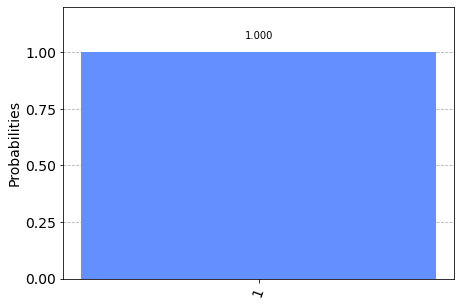

In [49]:
plot_histogram(counts)

S, S Dagger, T & T Dagger Gates in Qiskit

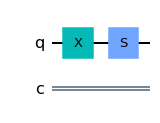

In [54]:
qc_s = QuantumCircuit(1,1, name='qc')
qc_s.x(0)
qc_s.s(0)
qc_s.draw('mpl')


 Qauntum State is:  [0.-0.j 0.+1.j]


C:\Users\madua\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


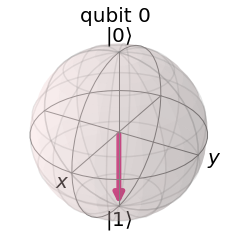

In [51]:
#to run on statevector simulator and plot on bloch sphere
backend= Aer.get_backend('statevector_simulator')
result = execute(qc_s, backend).result().get_statevector(qc_s, decimals=3)
print('\n Qauntum State is: ', result)
plot_bloch_multivector(result)

In [53]:
backend = Aer.get_backend('unitary_simulator')
s_unitary = execute(qc_s, backend)
s_unitary.result().get_unitary(qc_s,decimals=3)

array([[0.-0.j, 1.-0.j],
       [0.+1.j, 0.-0.j]])

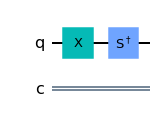

In [56]:
# S Dagger Gate
qc_sdg = QuantumCircuit(1,1, name= 'qc')
qc_sdg.x(0)
qc_sdg.sdg(0)
qc_sdg.draw('mpl')


 Quantum State is:  [0.+0.j 0.-1.j]


C:\Users\madua\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


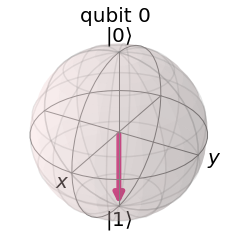

In [57]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc_sdg, backend).result().get_statevector(qc_sdg,decimals=3)
print('\n Quantum State is: ', result)
plot_bloch_multivector(result)

In [60]:
backend = Aer.get_backend('unitary_simulator')
sdg_unitary = execute(qc_sdg, backend)
result = sdg_unitary.result().get_unitary(qc_sdg,decimals=3)
result

array([[0.+0.j, 1.-0.j],
       [0.-1.j, 0.+0.j]])

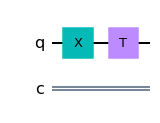

In [65]:
# T GATE

qc_t = QuantumCircuit(1,1,name='qc')
qc_t.x(0)
qc_t.t(0)
qc_t.draw('mpl')


 Quantum state:  [0.   -0.j    0.707+0.707j]


C:\Users\madua\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


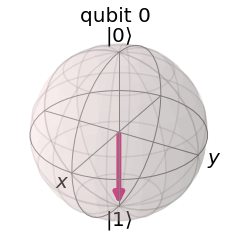

In [67]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc_t, backend).result().get_statevector(qc_t,decimals=3)
print('\n Quantum state: ',result)
plot_bloch_multivector(result)

In [68]:
backend = Aer.get_backend('unitary_simulator')
t_unitary = execute(qc_t, backend)
t_unitary.result().get_unitary(qc_t,decimals=3)

array([[0.   -0.j   , 1.   +0.j   ],
       [0.707+0.707j, 0.   -0.j   ]])

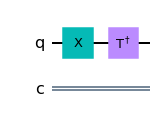

In [70]:
#T DAGGER
qc_tdg = QuantumCircuit(1,1,name='qc')
qc_tdg.x(0)
qc_tdg.tdg(0)
qc_tdg.draw('mpl')


 Quantum state:  [0.   +0.j    0.707-0.707j]


C:\Users\madua\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


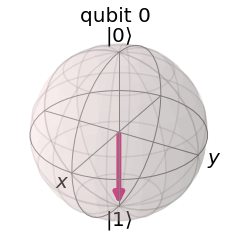

In [71]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc_tdg, backend).result().get_statevector(qc_tdg,decimals=3)
print('\n Quantum state: ',result)
plot_bloch_multivector(result)

In [72]:
backend = Aer.get_backend('unitary_simulator')
tdg_unitary = execute(qc_tdg, backend)
tdg_unitary.result().get_unitary(qc_tdg,decimals=3)

array([[0.   +0.j   , 1.   +0.j   ],
       [0.707-0.707j, 0.   +0.j   ]])

RX RY AND RZ ROTATION GATES IN QISKIT

In [ ]:
#RX GATE
''' RX gate is a parameterized gate used for customized rotation

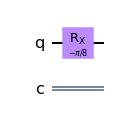

In [22]:
theta_x = -pi/8 #rotation is around y ie the big circle that cuts at y
qc_rx = QuantumCircuit(1,1,name='qc')
qc_rx.rx(theta_x,0)
qc_rx.draw(output='mpl')


 Quantum state:  [0.981+0.j    0.   +0.195j]


C:\Users\madua\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


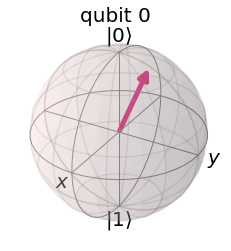

In [23]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc_rx,backend).result().get_statevector(qc_rx,decimals=3)
print('\n Quantum state: ', result)
plot_bloch_multivector(result)


In [136]:
backend = Aer.get_backend('unitary_simulator')
rx_unitary = execute(qc_rx, backend)
rx_unitary.result().get_unitary(qc_rx, decimals=3)

array([[-0.866+0.j ,  0.   -0.5j],
       [ 0.   -0.5j, -0.866+0.j ]])

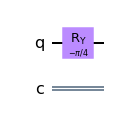

In [30]:
#RY GATE
theta_y = -pi/4 #rotation is about the x axis(the thick line)
qc_ry = QuantumCircuit(1,1,name='qc')
qc_ry.ry(theta_y,0)
qc_ry.draw(output='mpl')

/n Quantum state is:  [ 0.924+0.j -0.383+0.j]


C:\Users\madua\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


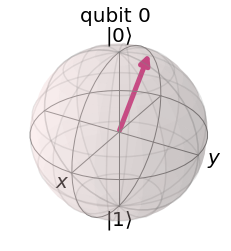

In [31]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc_ry, backend).result().get_statevector(qc_ry, decimals=3)
print('/n Quantum state is: ', result)
plot_bloch_multivector(result)

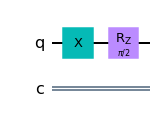

In [39]:
#RZ GATE
theta_z = pi/2
qc_rz = QuantumCircuit(1,1,name='qc')
qc_rz.x(0)
qc_rz.rz(theta_z,0)
qc_rz.draw(output='mpl')

/nQuantum state ps:  [0.   +0.j    0.707+0.707j]


C:\Users\madua\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


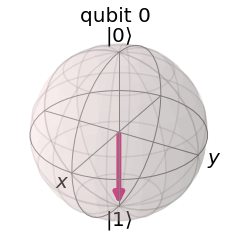

In [40]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc_rz, backend).result().get_statevector(qc_rz, decimals=3)
print('/nQuantum state ps: ', result)
plot_bloch_multivector(result)

In [190]:
backend = Aer.get_backend('unitary_simulator')
rz_unitary = execute(qc_rz, backend)
rz_unitary.result().get_unitary(qc_rz, decimals=3)

array([[0.   +0.j   , 0.924-0.383j],
       [0.924+0.383j, 0.   +0.j   ]])

MULTIPLE QUBIT QUANTUM GATES

In [204]:
from qiskit.visualization import plot_state_city #Density Matrix plot
from qiskit.visualization import plot_state_qsphere #used for multi Qubit visualization


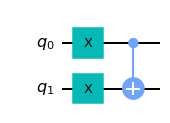

In [205]:
#QUANTUM CNOT/CX GATE
''' since qiskit is using little endian ordering system, when we apply CX-gate on
|11> in normal intuition, you should get |10> but according to qiskit ordering,
you will get |01>'''
qc_cx = QuantumCircuit(2,name='qc')
qc_cx.x(0) #x gate on the first qubit
qc_cx.x(1) #x gate on the second qubit
qc_cx.cx(0,1) #cx gate with first qubit as control and the second qubit as the target
qc_cx.draw('mpl')


Quantum state is:  [0.+0.j 1.+0.j 0.+0.j 0.+0.j]


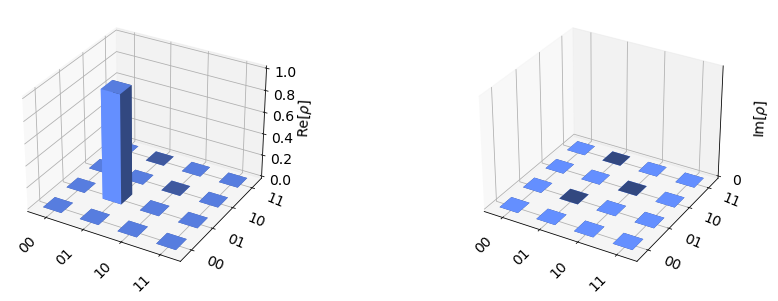

In [207]:
#to get the eigenvector, we use thr statevector simulator in the core of the circuit
simulator_state = Aer.get_backend('statevector_simulator')
job_state = execute(qc_cx, simulator_state)
result_state = job_state.result()
psi = result_state.get_statevector(qc_cx)
print('\nQuantum state is: ',psi)

#Plot a Density Matrix plot
plot_state_city(psi)

C:\Users\madua\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


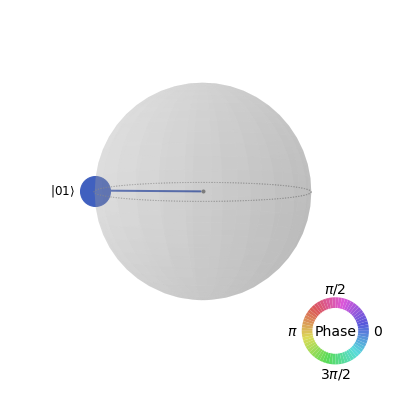

In [208]:
#Plot the Qsphere
psi = result_state.get_statevector(qc_cx)
plot_state_qsphere(psi)

In [ ]:
''' from the qiskit ordering, you can see that this is |01>
the thickness of the blue blob determines the probability value, 
which means, the thicker it is, then it is close to 100%
but the if the blue blob is small then it has less probability of occurance


In [210]:
#to get the unitary matrix
backend = Aer.get_backend('unitary_simulator')
cx_unitary = execute(qc_cx, backend)
cx_unitary.result().get_unitary(qc_cx, decimals=3)

array([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]])

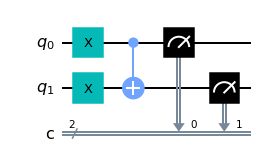

In [213]:
#Running CNOT Gate circuit using QASM Simulator
qc_cx = QuantumCircuit(2,2,name='qc')
qc_cx.x(0)
qc_cx.x(1)
qc_cx.cx(0,1)
qc_cx.measure([0,1],[0,1]) #this reads, zero qubit goes to the zero classical and one qubit goes to the one classic

qc_cx.draw('mpl')


Total counts area:  {'01': 10000}


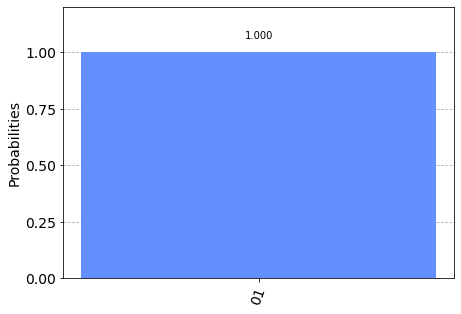

In [216]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc_cx, backend, shots=10000)
result = job.result()
counts = result.get_counts(qc_cx)
print('\nTotal counts area: ', counts)

#plot a histogram 
plot_histogram(counts)

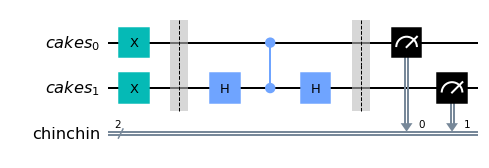

In [232]:
#another was to construct CNOT gate from two hadamrd gates and one cz gate
q = QuantumRegister(2, 'cakes')
#u = QuantumRegister(1, 'doughnut')
c =ClassicalRegister(2, 'chinchin')
qc_cx = QuantumCircuit(q,c)
qc_cx.x(q[0])
qc_cx.x(q[1])
qc_cx.barrier()
qc_cx.h(q[1]) #apply H gate on the second qubit
qc_cx.cz(q[0],q[1])
qc_cx.h(q[1])
qc_cx.barrier()
qc_cx.measure(q,c)

qc_cx.draw('mpl')


Total counts area:  {'01': 10000}


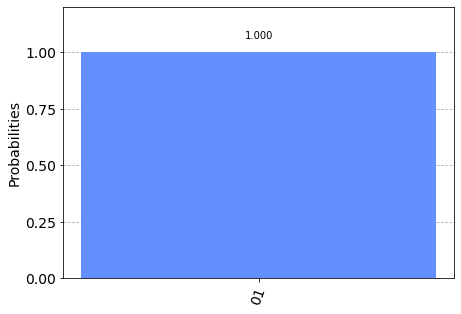

In [233]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc_cx, backend, shots=10000)
result = job.result()
counts = result.get_counts(qc_cx)
print('\nTotal counts area: ', counts)

#plot a histogram 
plot_histogram(counts)

In [ ]:
#As shown above, we can see that it produces the same result as the cnot gate

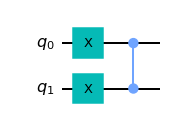

In [234]:
#Quantum CZ GATE
'''remember that this gate flips the phase of a qubit only when the control is one
'''
qc_cz = QuantumCircuit(2, name= 'qc')
qc_cz.x(0)
qc_cz.x(1)
qc_cz.cz(0,1)
qc_cz.draw('mpl')


Quantum state is:  [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]


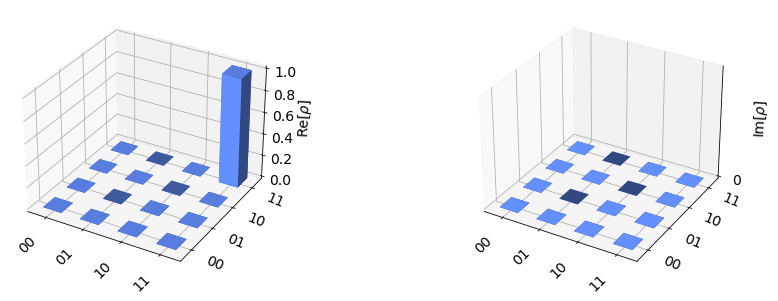

In [235]:
#Density matrix plot for CZ gate
simulator_state = Aer.get_backend('statevector_simulator')
job_state = execute(qc_cz, simulator_state)
result_state = job_state.result()
psi = result_state.get_statevector(qc_cz)
print('\nQuantum state is: ', psi)

plot_state_city(psi )

C:\Users\madua\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


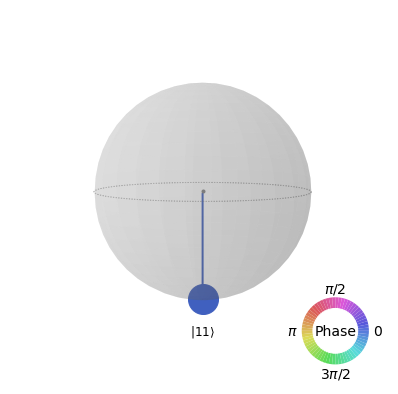

In [236]:
#lets plot the qsphere
psi = result_state.get_statevector(qc_cz)
plot_state_qsphere(psi) #check my bible to see the mathematical interpretation of this

In [237]:
#for the unitary matrix for cz gate
backend= Aer.get_backend("unitary_simulator")
cz_unitary = execute(qc_cz, backend)
cz_unitary.result().get_unitary(qc_cz, decimals=3)

array([[ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
       [-1.+0.j, -0.+0.j, -0.+0.j, -0.+0.j]])

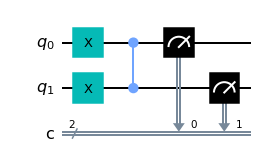

In [241]:
qc_cz = QuantumCircuit(2,2, name= 'qc')
qc_cz.x(0)
qc_cz.x(1)
qc_cz.cz(0,1)
qc_cz.measure([0,1],[0,1])
qc_cz.draw('mpl')


Total counts are:  {'11': 10000}


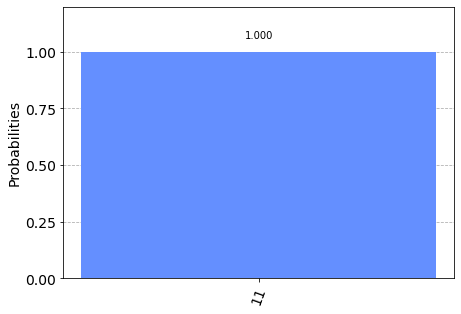

In [242]:
#so to run the code on qasm simulator
backend = Aer.get_backend('qasm_simulator')
job =execute(qc_cz, backend,shots=10000)
result = job.result()
counts = result.get_counts(qc_cz)
print('\nTotal counts are: ', counts)
plot_histogram(counts)

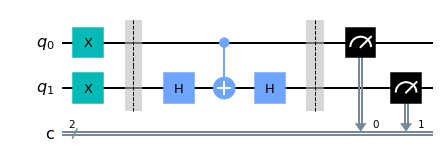

In [245]:
# so lets show how we can obtain CZ Gate using CNOT and H gates
qc_cz = QuantumCircuit(2,2, name='qc')
qc_cz.x(0)
qc_cz.x(1)
qc_cz.barrier()
qc_cz.h(1)
qc_cz.cx(0,1)
qc_cz.h(1)
qc_cz.barrier()
qc_cz.measure([0,1],[0,1])
qc_cz.draw('mpl')


Total counts are: {'11': 10000}


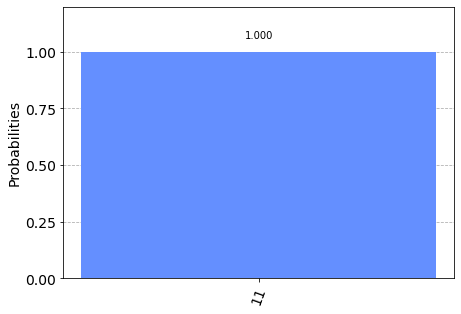

In [248]:
#if you execute this circuit on a qasm simulator you get the same result as the cz gate
backend = Aer.get_backend('qasm_simulator')
job = execute(qc_cz, backend, shots =10000)
result = job.result()
counts = result.get_counts(qc_cz)
print('\nTotal counts are:', counts)
plot_histogram(counts)

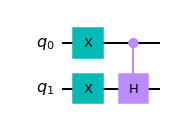

In [249]:
#Quantum CH Gate
#CH-gate on |11>
qc_ch = QuantumCircuit(2,name='qc')
qc_ch.x(0)
qc_ch.x(1)
qc_ch.ch(0,1)
qc_ch.draw('mpl')


Quantum state is:  [ 0.        +0.j  0.70710678+0.j  0.        +0.j -0.70710678+0.j]


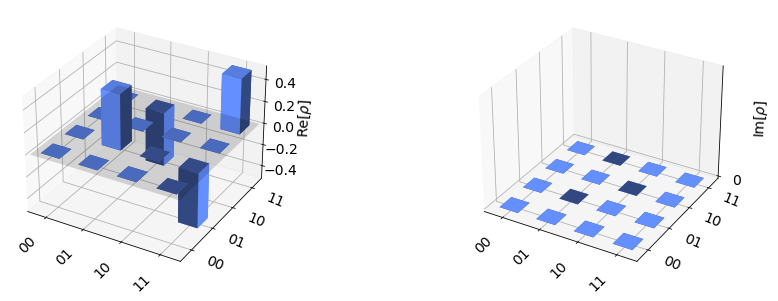

In [250]:
simulator_state = Aer.get_backend('statevector_simulator')
job_state = execute(qc_ch, simulator_state)
result_state = job_state.result()
psi = result_state.get_statevector(qc_ch)
print('\nQuantum state is: ', psi)
plot_state_city(psi) #check my bible to see the mathematical interpretation of this


''' from the diagram below you will see that some bars are going towards the
negative direction while some bars are going towards the positive direction
'''

C:\Users\madua\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


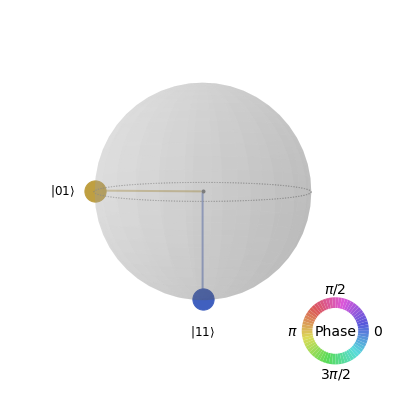

In [251]:
#qsphere plot for the CH Gate
psi = result_state.get_statevector(qc_ch)
plot_state_qsphere(psi)
#the different color is due to the phase difference 

In [252]:
#Unitary operator for CH Gate
backend = Aer.get_backend('unitary_simulator')
ch_unitary = execute(qc_ch, backend)
ch_unitary.result().get_unitary(qc_ch, decimals=3)


array([[ 0.   +0.j,  0.   +0.j,  0.   +0.j,  1.   -0.j],
       [ 0.707+0.j,  0.   +0.j,  0.707-0.j,  0.   +0.j],
       [ 0.   +0.j,  1.   +0.j,  0.   +0.j, -0.   +0.j],
       [-0.707+0.j,  0.   +0.j,  0.707-0.j,  0.   +0.j]])

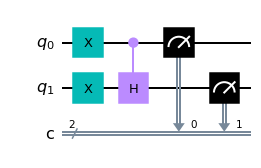

In [253]:
#to run the ch gate with the qasm simulator
qc_ch = QuantumCircuit(2,2, name='qc')
qc_ch.x(0)
qc_ch.x(1)
qc_ch.ch(0,1)
qc_ch.measure([0,1],[0,1])
qc_ch.draw('mpl')


 Total counts are:  {'11': 495, '01': 505}


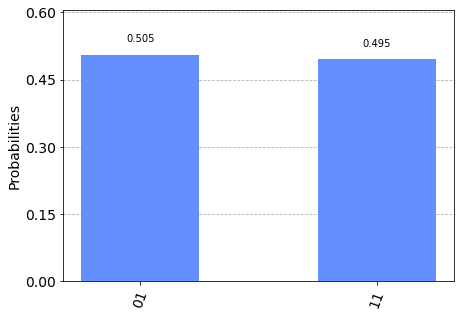

In [255]:
backend = Aer.get_backend('qasm_simulator')
job= execute(qc_ch, backend,shots=1000)
result = job.result()
counts = result.get_counts(qc_ch)
print('\n Total counts are: ', counts)
plot_histogram(counts)

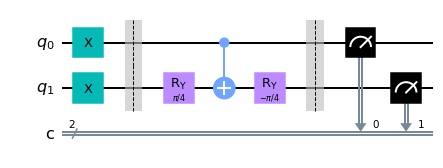

In [257]:
#you can achieve CH gate using CNOT and Ry Gates
qc_ch = QuantumCircuit(2,2,name='qc')
qc_ch.x(0)
qc_ch.x(1)
qc_ch.barrier()
qc_ch.ry(pi/4, 1)
qc_ch.cx(0,1)
qc_ch.ry(-pi/4, 1)
qc_ch.barrier()
qc_ch.measure([0,1],[0,1])
qc_ch.draw('mpl')



 Total counts are:  {'01': 502, '11': 498}


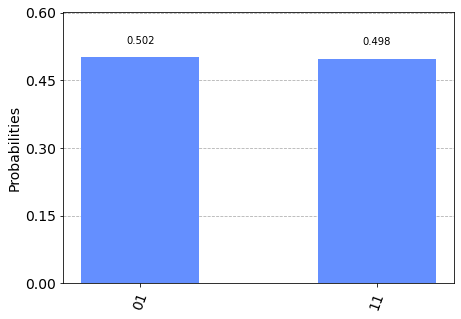

In [258]:
backend = Aer.get_backend('qasm_simulator')
job= execute(qc_ch, backend,shots=1000)
result = job.result()
counts = result.get_counts(qc_ch)
print('\n Total counts are: ', counts)
plot_histogram(counts)

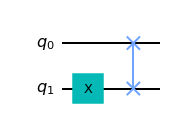

In [261]:
#Quantum SWAP Gate
#SWAP Gate on |01> = |10>  but according qiskit ordering
# it becomes |01>

qc_sw = QuantumCircuit(2, name='qc')
qc_sw.x(1)
qc_sw.swap(0,1)
qc_sw.draw('mpl')







 Quantum state is:  [0.+0.j 1.+0.j 0.+0.j 0.+0.j]


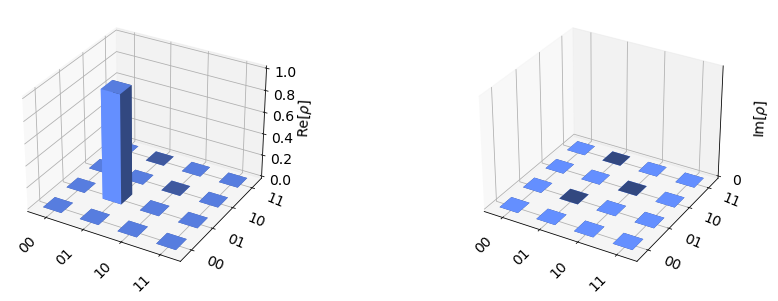

In [263]:
simulator_state = Aer.get_backend('statevector_simulator')
job_state = execute(qc_sw, simulator_state)
result_state = job_state.result()
psi = result_state.get_statevector(qc_sw)
print('\n Quantum state is: ', psi)
plot_state_city(psi)

C:\Users\madua\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


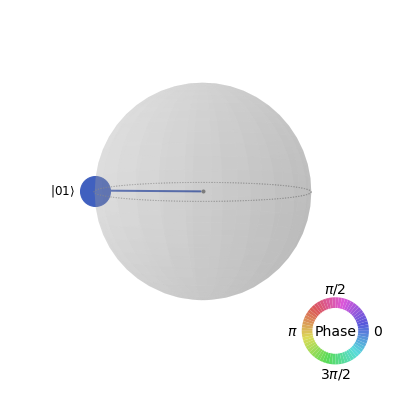

In [264]:
#to plot the qsphere operation
psi = result_state.get_statevector(qc_sw)
plot_state_qsphere(psi)

In [265]:
#the unitary operator for SWAP Gate
backend = Aer.get_backend('unitary_simulator')
sw_unitary = execute(qc_sw, backend)
sw_unitary.result().get_unitary(qc_sw, decimals=3)

array([[0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]])

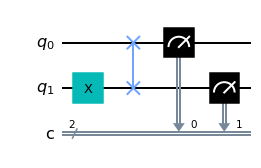

In [268]:
#to run it on a qasm simulator in order to check the probabilities 

qc_sw = QuantumCircuit(2,2, name='qc')
qc_sw.x(1)
qc_sw.swap(0,1)
qc_sw.measure([0,1],[0,1])
qc_sw.draw('mpl')



Total counts are: {'01': 1000}


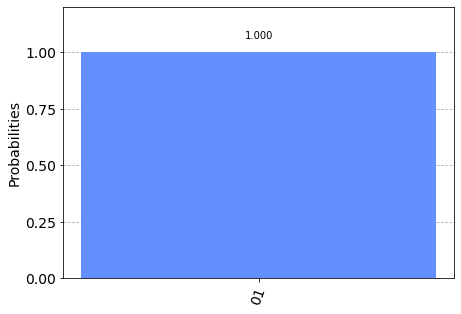

In [269]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc_sw, backend, shots =1000)
result = job.result()
counts = result.get_counts(qc_sw)
print('\nTotal counts are:', counts)
plot_histogram(counts)

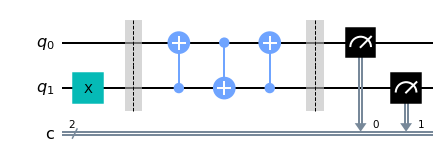

In [272]:
#SWAP Gate using CNOT Gates - first method
qc_sw = QuantumCircuit(2,2,name='qc')
qc_sw.x(1)
qc_sw.barrier()
qc_sw.cx(1,0)
qc_sw.cx(0,1)
qc_sw.cx(1,0)
qc_sw.barrier()
qc_sw.measure([0,1],[0,1])
qc_sw.draw('mpl')


Total counts are: {'01': 1000}


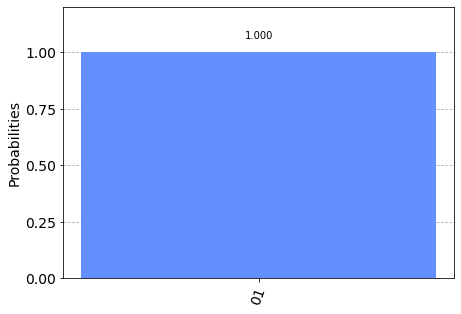

In [273]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc_sw, backend, shots =1000)
result = job.result()
counts = result.get_counts(qc_sw)
print('\nTotal counts are:', counts)
plot_histogram(counts)

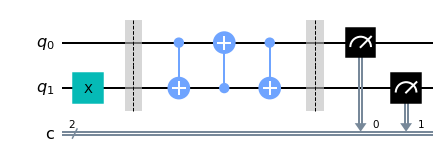

In [274]:
qc_sw = QuantumCircuit(2,2,name='qc')
qc_sw.x(1)
qc_sw.barrier()
qc_sw.cx(0,1)
qc_sw.cx(1,0)
qc_sw.cx(0,1)
qc_sw.barrier()
qc_sw.measure([0,1],[0,1])
qc_sw.draw('mpl')


Total counts are: {'01': 1000}


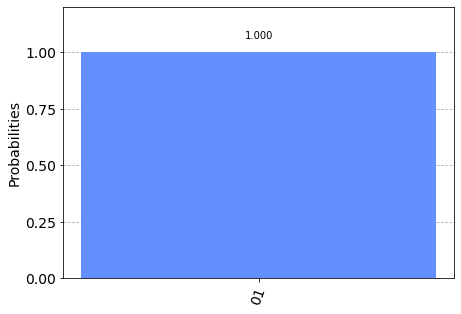

In [275]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc_sw, backend, shots =1000)
result = job.result()
counts = result.get_counts(qc_sw)
print('\nTotal counts are:', counts)
plot_histogram(counts)

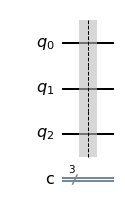

In [8]:
qc = QuantumCircuit(3,3)
qc.barrier([0,1,2])
qc.draw('mpl')

In [41]:
qc.barrier()
qc.draw()

░  ░ 
q_0: ─░──░─
      ░  ░ 
q_1: ─░──░─
      ░  ░ 
q_2: ─░──░─
      ░  ░ 
c: 3/══════